# Bike Sharing Assignment

## Importing Libraries

In [1]:
# base libraries
import pandas as pd
import numpy as np

In [2]:
# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Data processing and feature engineering libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# Modeling libraries
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Understanding Data

In [5]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# columns are not very much readable. So to understand the data better, I have renamed it properly.
bike.rename(columns={"dteday": "date", "yr": "year", "mnth": "month", "weathersit": "weather_situation", "temp": "temprature",
                   "atemp": "feeling_temprature", "hum": "humidity", "cnt": "demand"}, inplace= True)
bike.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_situation,temprature,feeling_temprature,humidity,windspeed,casual,registered,demand
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   instant             730 non-null    int64  
 1   date                730 non-null    object 
 2   season              730 non-null    int64  
 3   year                730 non-null    int64  
 4   month               730 non-null    int64  
 5   holiday             730 non-null    int64  
 6   weekday             730 non-null    int64  
 7   workingday          730 non-null    int64  
 8   weather_situation   730 non-null    int64  
 9   temprature          730 non-null    float64
 10  feeling_temprature  730 non-null    float64
 11  humidity            730 non-null    float64
 12  windspeed           730 non-null    float64
 13  casual              730 non-null    int64  
 14  registered          730 non-null    int64  
 15  demand              730 non-null    int64  
dtypes: float

In [8]:
bike.shape

(730, 16)

In [9]:
bike.isna().sum()

instant               0
date                  0
season                0
year                  0
month                 0
holiday               0
weekday               0
workingday            0
weather_situation     0
temprature            0
feeling_temprature    0
humidity              0
windspeed             0
casual                0
registered            0
demand                0
dtype: int64

Observation:
- number of data points: 730
- number of features: 16
- no null values
- all features except dteday are numeric

In [10]:
bike.describe()

,instant,season,year,month,holiday,weekday,workingday,weather_situation,temprature,feeling_temprature,humidity,windspeed,casual,registered,demand
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# checking uniqueness for all the columns in order to drop non essential columns

for col in bike.columns:
    print('Number of unique values in', col, ':', len(bike[col].unique()))

Number of unique values in instant : 730
Number of unique values in date : 730
Number of unique values in season : 4
Number of unique values in year : 2
Number of unique values in month : 12
Number of unique values in holiday : 2
Number of unique values in weekday : 7
Number of unique values in workingday : 2
Number of unique values in weather_situation : 3
Number of unique values in temprature : 498
Number of unique values in feeling_temprature : 689
Number of unique values in humidity : 594
Number of unique values in windspeed : 649
Number of unique values in casual : 605
Number of unique values in registered : 678
Number of unique values in demand : 695


Observation:
- instant and date are completely having unique values

In [12]:
bike.drop(['instant', 'date'], axis=1, inplace=True)
bike.shape

(730, 14)

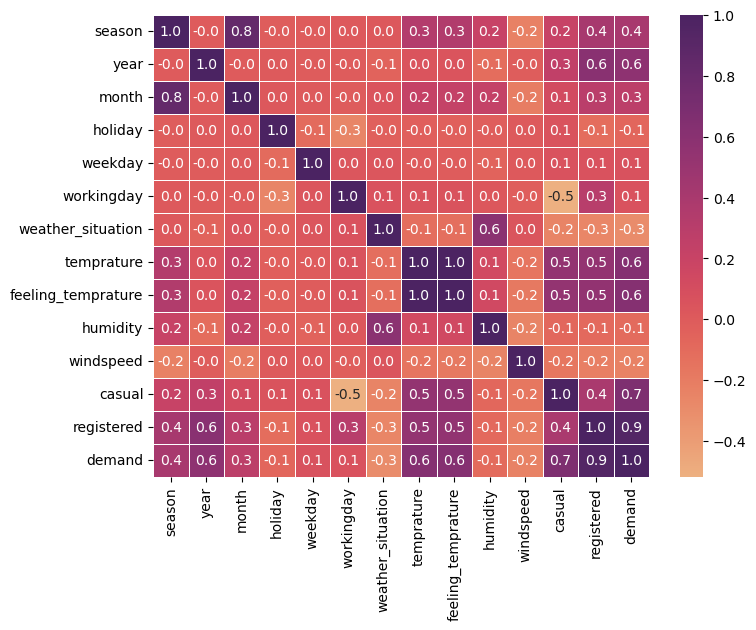

In [13]:
# Checking correlation
plt.figure(figsize= (8,6))
sns.heatmap(bike.select_dtypes(include=np.number).corr(), annot=True, fmt=".1f", cmap='flare', linewidth=.5)
plt.show()

C:\Users\trita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


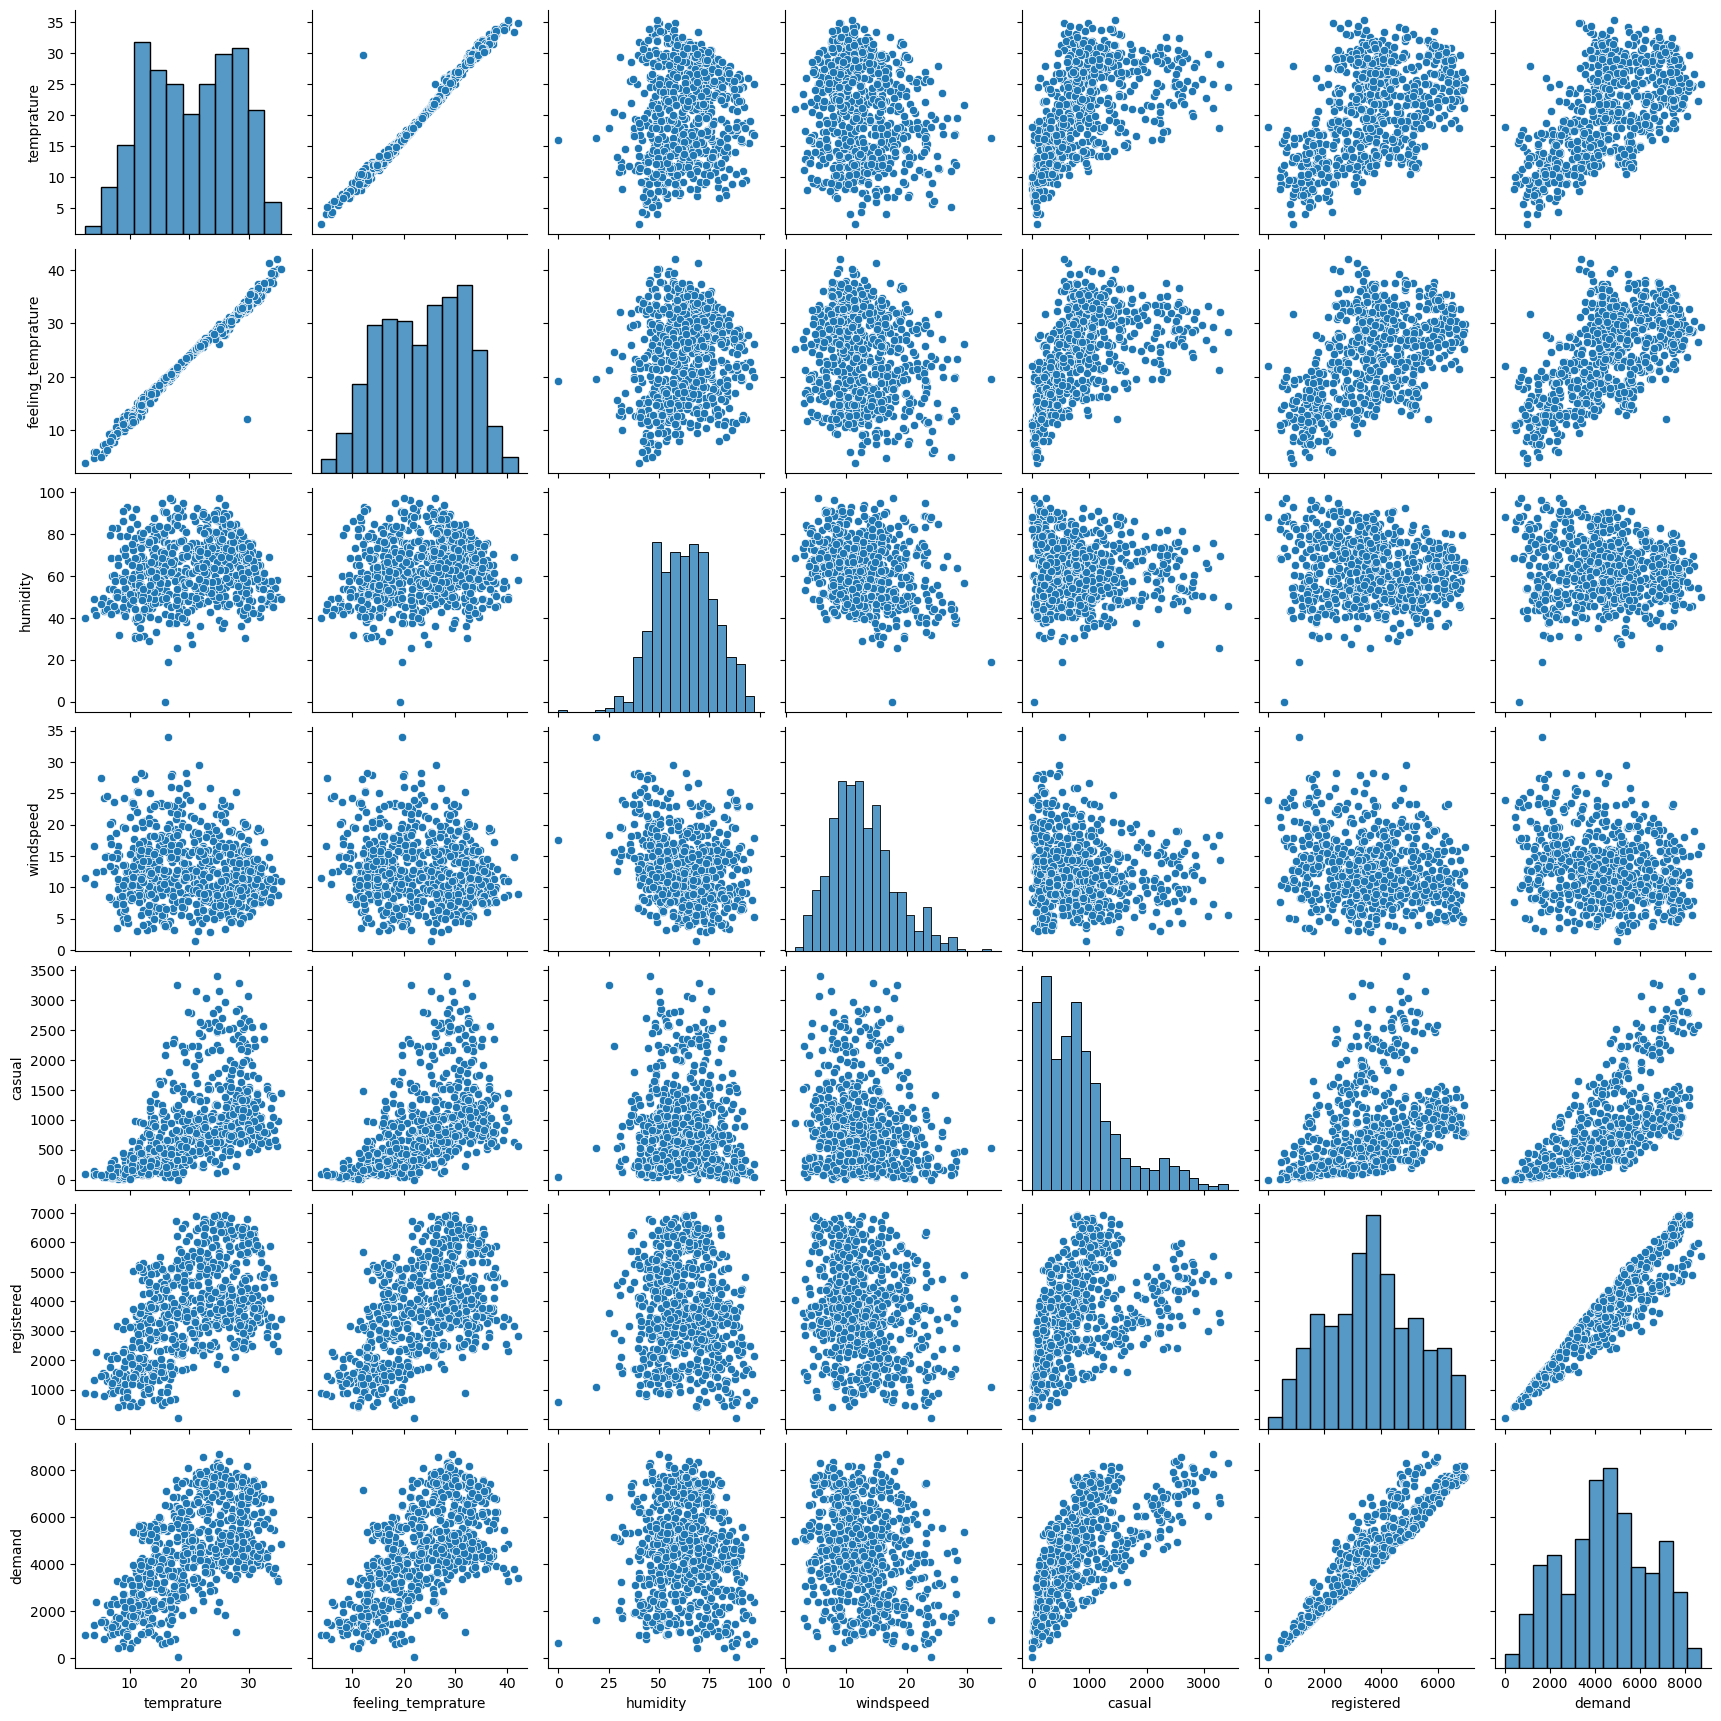

In [14]:
# pair plot for numeric variables
sns.pairplot(bike[['temprature', 'feeling_temprature', 'humidity', 'windspeed', 'casual', 'registered',  'demand']])
plt.show()

Observation:
- temprature and feeling temprature are fully correalted, and can be dropped
- humidity has a correlation with workingday, need to do statistical test to verify which is more significant to model
- year has a pretty good impact on demand.
- casual and registerded have significant impact on temprature columns, seasons and year as well. 
- casual and registered are higly correlated to each other and as well as demand. also according to data dict they togather make up demand. So can be dropped

In [15]:
bike.drop(['feeling_temprature', 'casual', 'registered'], axis=1, inplace=True)

bike.shape

(730, 11)

In [16]:
# numeric values associated with the season, year, month, weekday, and weather_situation, 
# so needs to be converted to string values for better undertsanding
bike['season'] = bike['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike['year'] = bike['year'].map({0: '2018', 1: '2019'})
bike['month'] = bike['month'].map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'june', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'})
bike['weekday'] = bike['weekday'].map({0: 'mon', 1: 'tue', 2: 'wed', 3: 'thur', 4: 'fri', 5: 'sat', 6: 'sun'})
bike['weather_situation'] = bike['weather_situation'].map({1: 'clear', 2: 'light', 3: 'medium', 4: 'heavy'})

bike.head()

,season,year,month,holiday,weekday,workingday,weather_situation,temprature,humidity,windspeed,demand
0,spring,2018,jan,0,sun,0,light,14.110847,80.5833,10.749882,985
1,spring,2018,jan,0,mon,0,light,14.902598,69.6087,16.652113,801
2,spring,2018,jan,0,tue,1,clear,8.050924,43.7273,16.636703,1349
3,spring,2018,jan,0,wed,1,clear,8.200000,59.0435,10.739832,1562
4,spring,2018,jan,0,thur,1,clear,9.305237,43.6957,12.522300,1600


Observation
- temprature seems to have a linear trend with demand
- humidity doesnt seem to have a linear trend with demand but bikes are in demand when humidity is between ~30 to 100 units.
- humidity also doesnt seem to have a linear trend with demand but bikes are in demand when windspeed is between ~5 to ~25 units.

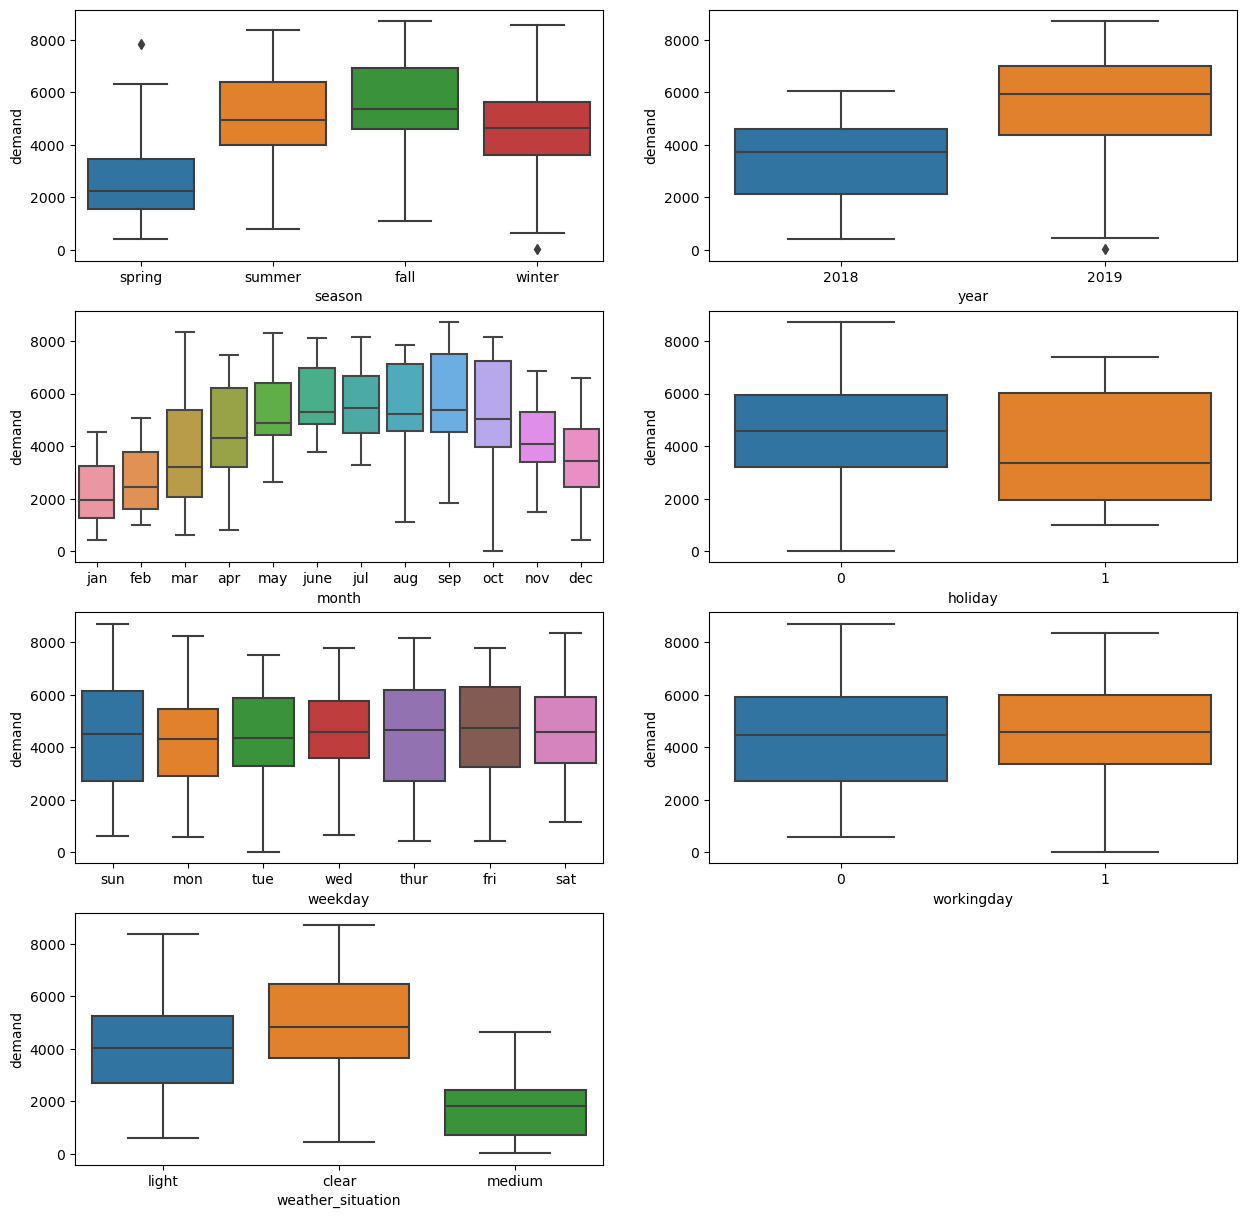

In [17]:
# plotting catergorical variables
plt.figure(figsize=(15, 15))
plt.subplot(4, 2, 1)
sns.boxplot(x = 'season', y = 'demand', data = bike)
plt.subplot(4, 2, 2)
sns.boxplot(x = 'year', y = 'demand', data = bike)
plt.subplot(4, 2, 3)
sns.boxplot(x = 'month', y = 'demand', data = bike)
plt.subplot(4, 2, 4)
sns.boxplot(x = 'holiday', y = 'demand', data = bike)
plt.subplot(4, 2, 5)
sns.boxplot(x = 'weekday', y = 'demand', data = bike)
plt.subplot(4, 2, 6)
sns.boxplot(x = 'workingday', y = 'demand', data = bike)
plt.subplot(4, 2, 7)
sns.boxplot(x = 'weather_situation', y = 'demand', data = bike)
plt.show()

Observation
- Fall season has the most demand generated.
- Demand has significantly gone up in 2019 as compared to 2018.
- June to September have the most demand for bikes.
- If it is a holiday bike demand is more.
- Over the weekday there is mostly similar demand of bikes
- Though median for demand is similar if it is working day or not, the larger set of demand is when it is not a working day.
- If the weather situation is Clear or there are only Few clouds or it is Partly cloudy then demand of bikes is significantly high, whereas there is no demand when there is Heavy Rain with falling Ice Pallets and Thunderstorm along with Mist or Snow with Fog

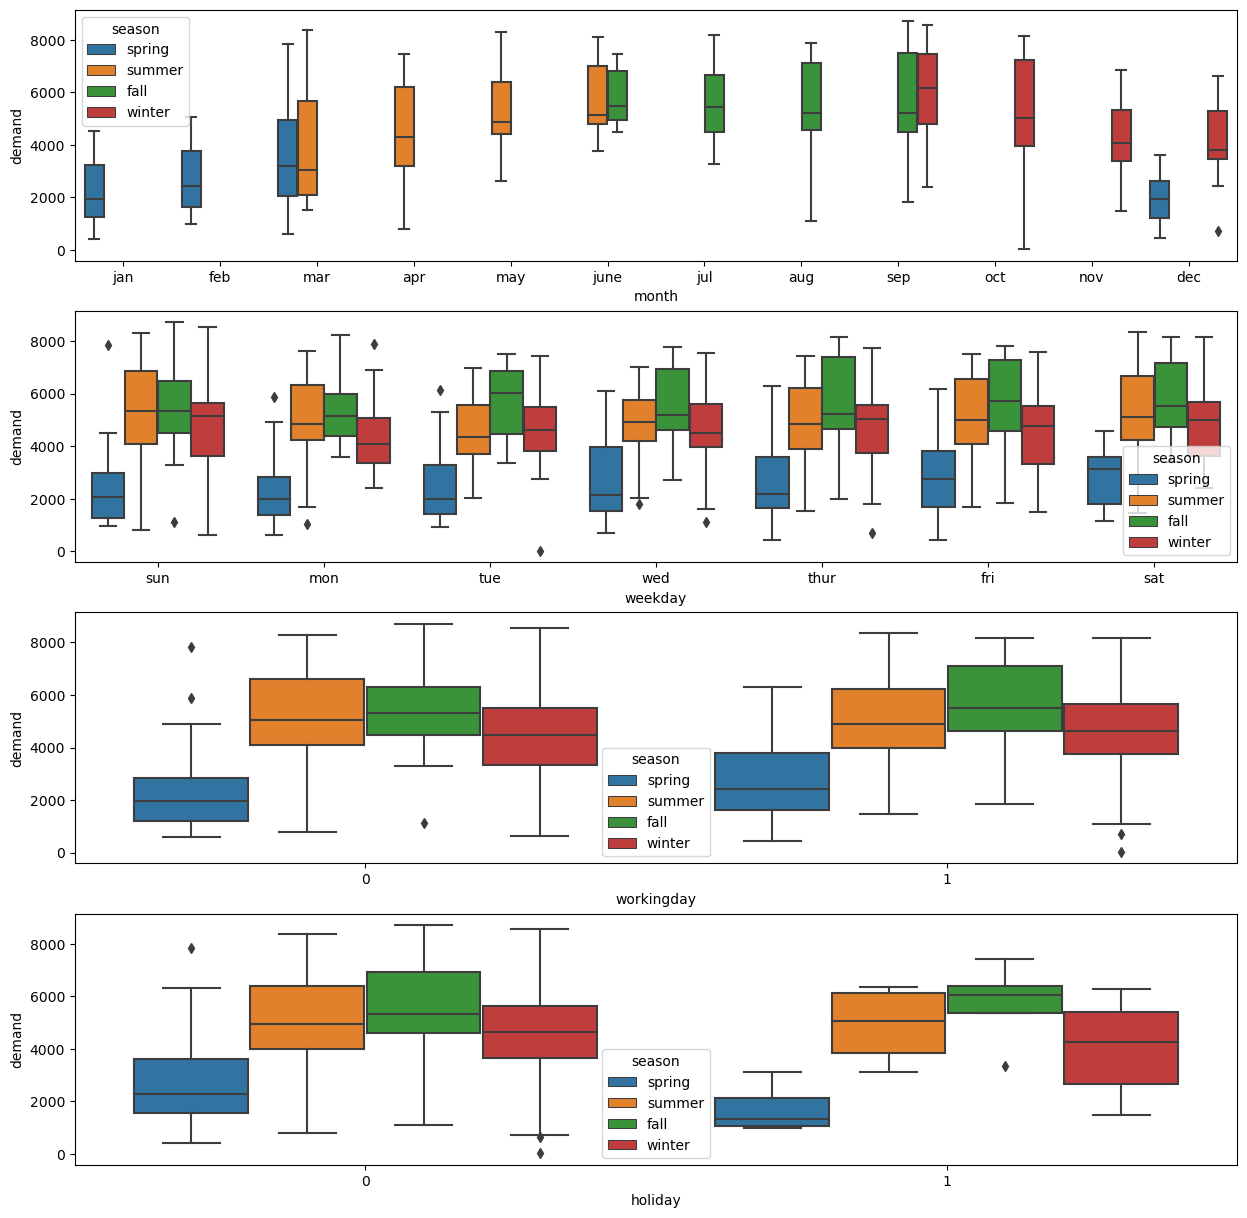

In [18]:
# digging deeper into categorical plots 
plt.figure(figsize=(15, 15))
plt.subplot(4, 1, 1)
sns.boxplot(x = 'month', y = 'demand', hue='season', data = bike)
plt.subplot(4, 1, 2)
sns.boxplot(x = 'weekday', y = 'demand', hue='season', data = bike)
plt.subplot(4, 1, 3)
sns.boxplot(x = 'workingday', y = 'demand', hue='season', data = bike)
plt.subplot(4, 1, 4)
sns.boxplot(x = 'holiday', y = 'demand', hue='season', data = bike)
plt.show()

Observation
- As it approaches fall from summer, demand increases. It becomes steady demand during fall and drops as it advances in winter.
- Sunday sees a constant high demand irrespective of any season except spring. And demands usually flow in from friday to sunday.
- Fall season sees demand irrespective of if its a working day or a holiday

## Feature engineering

In [19]:
# creating dummy variable
dummy_features = pd.get_dummies(bike.select_dtypes(include= 'object'), drop_first=True)
dummy_features

,season_spring,season_summer,season_winter,year_2019,month_aug,month_dec,month_feb,month_jan,month_jul,month_june,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weather_situation_light,weather_situation_medium
0,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,True,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
726,True,False,False,True,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
727,True,False,False,True,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
728,True,False,False,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [20]:
bike = pd.concat([bike, dummy_features], axis=1)
bike.drop(['season', 'year', 'month', 'weekday', 'weather_situation'], axis=1, inplace=True)

bike.head()

,holiday,workingday,temprature,humidity,windspeed,demand,season_spring,season_summer,season_winter,year_2019,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weather_situation_light,weather_situation_medium
0,0,0,14.110847,80.5833,10.749882,985,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0,0,14.902598,69.6087,16.652113,801,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,0,1,8.050924,43.7273,16.636703,1349,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0,1,8.200000,59.0435,10.739832,1562,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,1,9.305237,43.6957,12.522300,1600,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


## Modelling

### Train Test Split

In [21]:
np.random.seed(0)
train, test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

print('Training data shape:', train.shape)
print('Testing data shape:', test.shape)

Training data shape: (510, 29)
Testing data shape: (219, 29)


### Scaling

In [22]:
scaler = MinMaxScaler()

num_vars = ['temprature', 'humidity', 'windspeed', 'demand']
train[num_vars] = scaler.fit_transform(train[num_vars])

train[num_vars].describe()

,temprature,humidity,windspeed,demand
count,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620
std,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.540519,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


Observation:
- all the numeric non-categorical columns are scaled between 0 and 1

### Linear Regression

In [23]:
y_train = train.pop('demand')
y_train.shape

(510,)

In [24]:
X_train = train
X_train.shape

(510, 28)

In [25]:
# Running RFE with the output number of the variable equal to 10
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

rfe = RFE(model_1, step= 15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temprature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('year_2019', True, 1),
 ('month_aug', False, 2),
 ('month_dec', False, 2),
 ('month_feb', False, 2),
 ('month_jan', True, 1),
 ('month_jul', False, 2),
 ('month_june', False, 2),
 ('month_mar', False, 2),
 ('month_may', False, 2),
 ('month_nov', False, 2),
 ('month_oct', False, 2),
 ('month_sep', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', False, 2),
 ('weekday_sun', True, 1),
 ('weekday_thur', False, 2),
 ('weekday_tue', False, 2),
 ('weekday_wed', False, 2),
 ('weather_situation_light', True, 1),
 ('weather_situation_medium', True, 1)]

In [26]:
X_train.columns[rfe.support_]


Index(['holiday', 'workingday', 'temprature', 'humidity', 'windspeed',
       'season_spring', 'season_winter', 'year_2019', 'month_jan', 'month_sep',
       'weekday_mon', 'weekday_sun', 'weather_situation_light',
       'weather_situation_medium'],
      dtype='object')

In [27]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'month_aug', 'month_dec', 'month_feb', 'month_jul',
       'month_june', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'weekday_sat', 'weekday_thur', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [28]:
X = X_train[X_train.columns[rfe.support_]].astype('float64') # Obtain only columns selected by RFE and converting boolean values to float (to be processed by stats linear model)

In [29]:
# Add a constant
X_train_lm = sm.add_constant(X)

# Create a fitted model
model_2 = sm.OLS(y_train, X_train_lm).fit()

# the summary of our linear model
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.1
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.98e-187
Time:                        22:11:00   Log-Likelihood:                 504.57
No. Observations:                 510   AIC:                            -981.1
Df Residuals:                     496   BIC:                            -921.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Observation
- holiday comes out to be insignificant (p value (0.894) is greater than 0.05). we have to rebuild the model without holiday

In [30]:
# Rebuilding
X.drop(['holiday'], axis=1, inplace=True)

# Add a constant
X_train_lm = sm.add_constant(X)

# Running the linear model
model_3 = sm.OLS(y_train, X_train_lm).fit()

# the summary of our linear model
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.1
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.98e-187
Time:                        22:11:00   Log-Likelihood:                 504.57
No. Observations:                 510   AIC:                            -981.1
Df Residuals:                     496   BIC:                            -921.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [31]:
# VIF calcluation
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,humidity,28.98
0,workingday,17.02
1,temprature,15.55
10,weekday_sun,4.60
3,windspeed,4.51
9,weekday_mon,4.47
4,season_spring,3.10
11,weather_situation_light,2.28
5,season_winter,2.18
6,year_2019,2.08


Observation:
- humidity, workingday and temprature have very high VIF.
- Since humidity has the most VIF, it should be dropped.

In [32]:
# Rebuilding
X.drop(['humidity'], axis=1, inplace=True)

# Add a constant
X_train_lm = sm.add_constant(X)

# Running the linear model
model_4 = sm.OLS(y_train, X_train_lm).fit()

# the summary of our linear model
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.83e-186
Time:                        22:11:01   Log-Likelihood:                 499.15
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     497   BIC:                            -917.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [33]:
# VIF calcluation again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,workingday,13.29
1,temprature,11.21
2,windspeed,4.49
9,weekday_sun,3.82
8,weekday_mon,3.58
3,season_spring,2.85
5,year_2019,2.07
4,season_winter,1.78
6,month_jan,1.64
10,weather_situation_light,1.57


Observation:
- weekday_mon has slightly high p value. It can be dropped.
- workingday and temprature have high VIF.

In [34]:
# Rebuilding
X.drop(['weekday_mon'], axis=1, inplace=True)

# Add a constant
X_train_lm = sm.add_constant(X)

# Running the linear model
model_5 = sm.OLS(y_train, X_train_lm).fit()   

# the summary of our linear model
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.62e-186
Time:                        22:11:01   Log-Likelihood:                 497.21
No. Observations:                 510   AIC:                            -970.4
Df Residuals:                     498   BIC:                            -919.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [35]:
# VIF calcluation again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temprature,5.53
0,workingday,4.47
2,windspeed,4.08
3,season_spring,2.36
5,year_2019,2.06
8,weekday_sun,1.80
6,month_jan,1.61
9,weather_situation_light,1.54
4,season_winter,1.43
7,month_sep,1.16


Observation:
- temprature as slightly high VIF value. It can be dropped.

In [36]:
# Rebuilding
X_check = X.drop(['temprature'], axis=1)

# Add a constant
X_train_lm_check = sm.add_constant(X_check)

model_6 = sm.OLS(y_train, X_train_lm_check).fit()   # Running the linear model

# the summary of our linear model
print(model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     172.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          5.23e-155
Time:                        22:11:02   Log-Likelihood:                 419.91
No. Observations:                 510   AIC:                            -817.8
Df Residuals:                     499   BIC:                            -771.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Observation: 
- Model r_square score reduces. Previous model was better (current: 0.77, previous: 0.83)

In [37]:
# setting the final model
final_model = model_5

## Residual analysis

In [38]:
# predicting on train set
y_train_hat = final_model.predict(X_train_lm)
y_train_hat.head()

653    0.723566
576    0.804017
426    0.486012
728    0.361659
482    0.582974
dtype: float64

C:\Users\trita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

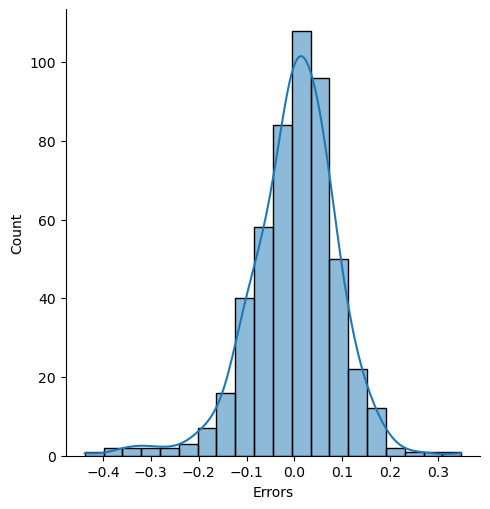

In [39]:
# Plot the histogram of the error terms
fig = plt.figure(figsize = (10, 10))
sns.displot((y_train - y_train_hat), bins = 20, kde=True)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors') 
plt.show()

In [40]:
res = pd.DataFrame({'y': y_train.values, 'y_hat': y_train_hat.values})
res.head()

,y,y_hat
0,0.864243,0.723566
1,0.827658,0.804017
2,0.465255,0.486012
3,0.204096,0.361659
4,0.482973,0.582974


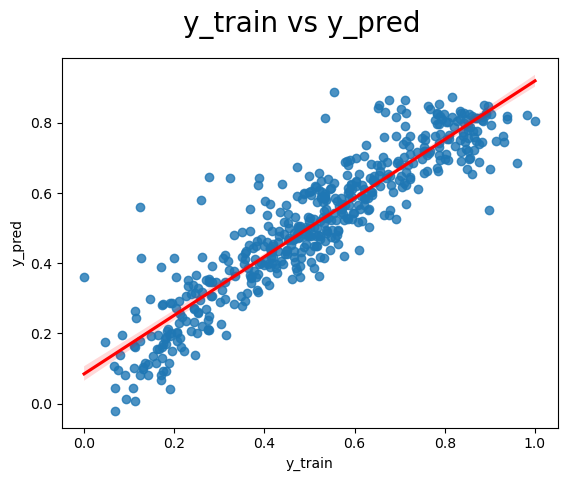

In [41]:
# Plotting y_train and y_pred to understand the spread

fig = plt.figure()
sns.regplot(data=res, x='y', y='y_hat', line_kws=dict(color="r"))
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train')
plt.ylabel('y_pred')      
plt.show()

Observation:
- Prob(F-Statistics) is 1.62e-186 < 0.05, this shows the overall model is significant and there is a linear relationship between demand and set of predictor variables.
- Plotting histogram of errors obtained, a normal distribution is also obtained.
- Scatter plot for actual demand and calculated demand shows there is homoscedasticity, i.e. error terms have constant variance
- Previously by eliminating highly correlated value using heatmap, VIF and p-values it is ensured that multi-collinearity doesn't exist. Hence we the features are independent.

### Predicting on test data

In [42]:
# Ready the test data
# sacling the test data
test[num_vars] = scaler.transform(test[num_vars])

# splitting into X_test, y_test
y_test = test.pop('demand')
X_test = test[X.columns].astype('float64')  # selecting only columns model is trained on

X_test.head()

,workingday,temprature,windspeed,season_spring,season_winter,year_2019,month_jan,month_sep,weekday_sun,weather_situation_light,weather_situation_medium
184,0.0,0.831783,0.084219,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
535,1.0,0.901354,0.153728,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
299,1.0,0.511964,0.334206,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
221,1.0,0.881625,0.339570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,1.0,0.817246,0.537414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# Add a constant
X_test_lm = sm.add_constant(X_test)

# predicting on test set
y_test_hat = final_model.predict(X_test_lm)
y_test_hat.head()

184    0.465673
535    0.854011
299    0.403806
221    0.582487
152    0.528195
dtype: float64

### Model Evaluation

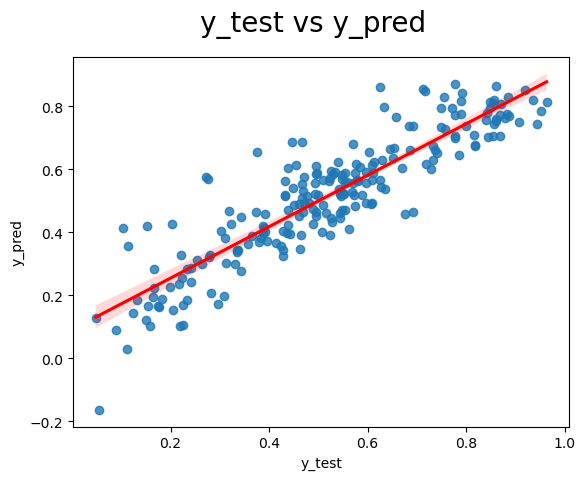

In [44]:
# Plotting y_test and y_pred to understand the spread
res = pd.DataFrame({'y': y_test.values, 'y_hat': y_test_hat.values})

fig = plt.figure()
sns.regplot(data=res, x='y', y='y_hat', line_kws=dict(color="r"))
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test')
plt.ylabel('y_pred')      
plt.show()

In [45]:
# RMSE on training data
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_hat)))
print('R_Square:', r2_score(y_train, y_train_hat))

RMSE: 0.09127699354664526
R_Square: 0.8345052486879752


In [46]:
# RMSE on testing data
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_hat)))
print('R_Square:', r2_score(y_test, y_test_hat))

RMSE: 0.09681842759941929
R_Square: 0.8026392583285674


In [47]:
final_model.params.sort_values()

weather_situation_medium   -0.294084
windspeed                  -0.147409
season_spring              -0.105342
weather_situation_light    -0.079216
month_jan                  -0.050007
season_winter               0.044025
workingday                  0.055785
weekday_sun                 0.066458
month_sep                   0.066495
const                       0.232655
year_2019                   0.236430
temprature                  0.390304
dtype: float64

## Final Equation for the model

$y\_hat$ = $const\times0.2327$ + $workingday\times0.0558$ + $temprature\times0.3903$ + $windspeed\times(-0.1474)$ + $season\_spring\times(-0.1053)$ + $season\_winter\times0.0440$ + $year\_2019\times0.2364$ + $month\_jan\times(-0.0500)$ + $month\_sep\times0.0665$ + $weekday\_sun\times(0.0665)$ + $weather\_situation\_light\times(-0.0792)$ + $weather\_situation\_medium\times(-0.2941)$

## Predicting using Sklearn

In [48]:
# using sklearn to predict
reg = LinearRegression()

reg.fit(X, y_train) # fitting

LinearRegression()

In [49]:
# determining coeffients
reg.coef_

array([ 0.05578518,  0.39030383, -0.14740901, -0.10534211,  0.04402489,
        0.23642963, -0.05000701,  0.06649452,  0.06645775, -0.07921628,
       -0.29408448])

In [50]:
# determining intercept
reg.intercept_

0.2326554427205555

In [51]:
# prediction
y_pred = reg.predict(X_test)

In [52]:
# RMSE on testing data
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R_Square:', r2_score(y_test, y_pred))

RMSE: 0.09681842759941932
R_Square: 0.8026392583285673


Observation
- It is same as we predicted using Statsmodel